<a href="https://colab.research.google.com/github/AshmithaMB/ML-hands-on/blob/main/Muliclass_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##***Logistic Regression (MultiClass Classification)***

###Dataset Description
The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

Importing Libraries and Hand-Written Digits Dataset


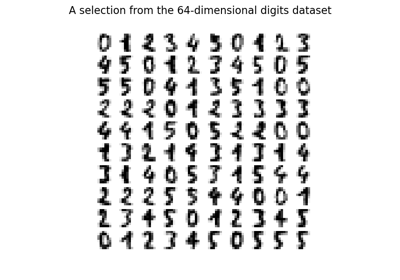

In [1]:
from sklearn.datasets import load_digits
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
digits = load_digits()

<Figure size 432x288 with 0 Axes>

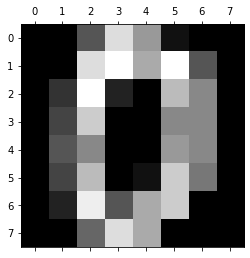

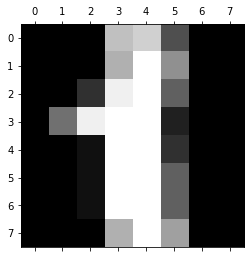

In [5]:
plt.gray()
for i in range(2):
  plt.matshow(digits.images[i])

* `matplotlib.pyplot.matshow()`  is mostly used to visualize 2D matrix. 
* It shows same color for the same number inside matrix.

In [7]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [14]:
digits.data[1]

array([ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
       15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
        0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
       16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.])

###Creating and training a Logistic Regression Model

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(
                                                    digits.data, 
                                                    digits.target, 
                                                    test_size = 0.2, 
                                                    random_state = 11
                                                    )

In [23]:
model = LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=10000)
model.fit(X_train, Y_train)

LogisticRegression(class_weight='balanced', max_iter=10000)

###Measuring the accuracy

In [25]:
model.score(X_test, Y_test)

0.975

In [26]:
model.predict(digits.data)

array([0, 1, 2, ..., 8, 9, 8])

In [37]:
digits.target[67]

6

In [36]:
model.predict([digits.data[67]])

array([6])

####Confusion Matrix

In [38]:
Y_predictions = model.predict(X_test)

In [39]:
from sklearn.metrics import confusion_matrix

In [40]:
cm = confusion_matrix(Y_test, Y_predictions)
cm

array([[38,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 36,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 39,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 39,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0, 41,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 27,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1, 29,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 35,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  1, 31,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 36]])

Text(69.0, 0.5, 'Actual')

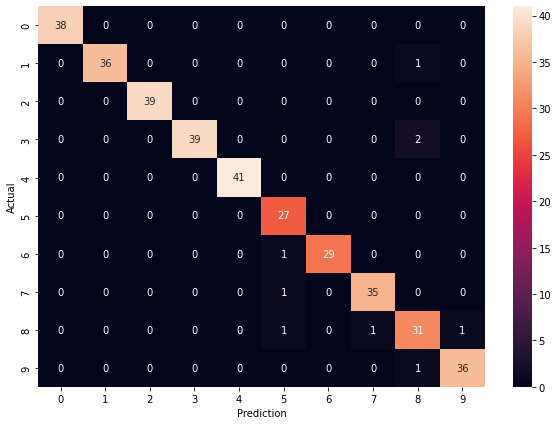

In [42]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Actual')